In [1]:
import pandas as pd
data=pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
data=data.drop("CUST_ID", axis=1)

In [3]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mode(),inplace=True)


In [5]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].median(),inplace=True)

In [6]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [7]:
data["CREDIT_LIMIT"].fillna(data["MINIMUM_PAYMENTS"].median(),inplace=True)

In [8]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  

In [11]:
agglomerative=pd.DataFrame(clust_labels)

agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


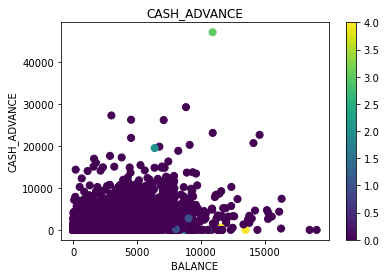

In [12]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["CASH_ADVANCE"] , c= agglomerative[0], s=50)
ax.set_title("CASH_ADVANCE")
ax.set_xlabel("BALANCE")
ax.set_ylabel("CASH_ADVANCE")
plt.colorbar(scatter)

In [13]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=5, random_state=0)  
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [14]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,4
1,2
2,0
3,0
4,4
...,...
8945,4
8946,4
8947,4
8948,4


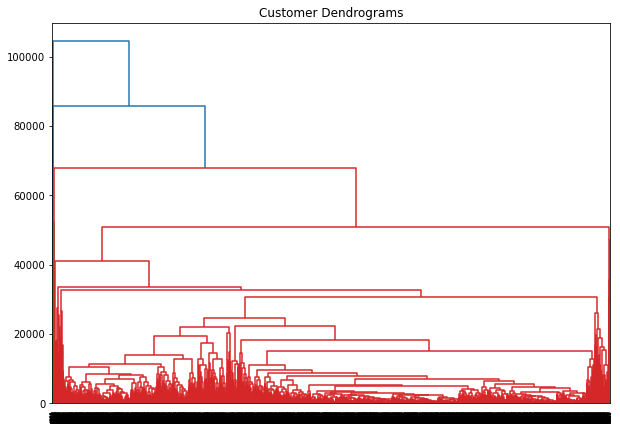

In [29]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete")

SyntaxError: unexpected EOF while parsing (<ipython-input-28-43dff3b4bf08>, line 4)

In [22]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=5, random_state=0)  
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [31]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,3
2,2
3,2
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [32]:
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[2.39330646e+03 9.70704104e-01 6.57395704e+03 4.42102210e+03
  2.15471009e+03 5.13686608e+02 9.12697991e-01 6.98260716e-01
  7.03910426e-01 6.83611006e-02 1.86094675e+00 7.37011834e+01
  7.99659763e+03 6.50831418e+03 1.21090446e+03 3.20618024e-01
  1.19260355e+01]
 [7.83713483e+02 8.50472491e-01 4.96041156e+02 2.39114231e+02
  2.57229239e+02 4.43645695e+02 4.51285368e-01 1.29143373e-01
  3.47373069e-01 1.07563996e-01 2.19357921e+00 9.35505446e+00
  2.11910941e+03 8.55676092e+02 5.21236331e+02 1.43562421e-01
  1.13649914e+01]
 [8.87596803e+02 8.71000238e-01 1.19983352e+03 7.00743360e+02
  4.99311640e+02 2.29094110e+02 6.18492312e-01 3.30067747e-01
  4.28774347e-01 4.96042244e-02 9.34883721e-01 1.89110465e+01
  6.95772463e+03 1.42573421e+03 3.44968739e+02 2.35651810e-01
  1.18069767e+01]
 [4.06588525e+03 9.58467806e-01 5.05512622e+02 2.79996417e+02
  2.25549558e+02 3.53986589e+03 3.11587514e-01 1.34276039e-01
  2.13455817e-01 3.69164885e-01 1.01517771e+01 8.61863593e+00
  6.36806392e+03

In [40]:
Sum_of_squared_distances=[]

k=range(1,10)
for k in k :
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    
    Sum_of_squared_distances.append(km.inertia_)


ValueError: x and y must have same first dimension, but have shapes (1,) and (9,)

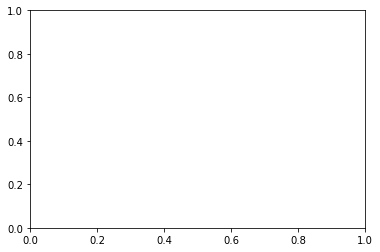

In [41]:
plt.plot(k,Sum_of_squared_distances,"bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distance")
plt.title("Elbow Method for Optimal k ")
plt.show()